#### *Output[12] You don't need to list all the 1511 Spotify song titles, it clutters up the report. Just give a few samples* 

#### *Since you ultimately didn't use the data from using spotify API, you shouldn't give the minute details of how you tried to retrieve the data. Instead, just explain in words what prevented the successful retrieval of data using the API. That will make the report a lot more readable*

#### *You should include a section called Conclusion that lists the things you learned through this project. 

#### *What's the point of the analysis without feature scaling/normalization? That doesn't provide any insight into the underlying question of predicting the popularity of a song. It should probably not be included.*

#### *For a case like this, which is not really a 'true' classification problem but determining where a song falls on a scale, it is not obvious that a multilayer NN will do better than, say a SVN. You should at least explore how one non-neural network ML algorithm performs.*

In [6]:
# NAME : Sailikith Kodumuri

# 1) TITLE : Forecasting the popularity of  songs.

# 2) SUMMARY : Impact of hidden layers in a neural network and importance of normalizing the data.

# 3) INTRODUCTION : 
# a) neural network is a computational model inspired by the structure and function of the human brain's interconnected network of neurons.
# It's a powerful machine learning technique used for solving a variety of tasks, including classification, regression, clustering, and more.



#b) About Optimizer - Optimizers are methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses. 
    #Optimizers help to get results faster.

#c) Adam-->aThe Adam optimizer, short for “Adaptive Moment Estimation,” is an iterative optimization algorithm used to minimize the 
#loss function during the training of neural networks. 
 #Adam can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum.

# 4- METHODOLOGY :

# a) Obtaining Data,loading and preprocessing.
# b) Building a neural n/w without scaling and no additional layers in between
# c) Building a neural n/w with scaling and no additional layers in between
# d) Building a neural n/w with scaling and 2 additional layers in between
# e) Comparing the training and testing accuracies between the 3 models

In [7]:
import os  # Import the 'os' module to interact with the operating system

import spotipy  # Import the 'spotipy' Python library ,it is designed to work with the Spotify Web API. 

from spotipy.oauth2 import SpotifyOAuth  # The SpotifyOAuth class from the spotipy.oauth2 module is a part of the Spotipy library for Python. It is used for implementing OAuth 2.0 authentication flow specifically tailored for Spotify.


# Set Spotify API credentials
os.environ["SPOTIPY_CLIENT_ID"] = "b0cf12459ee8491f94b260d88e1a6ed4"  # Set the Spotify client ID
os.environ["SPOTIPY_CLIENT_SECRET"] = "2364ba5921e040ac897870d9b15e9a6b"  # Set the Spotify client secret
os.environ["SPOTIPY_REDIRECT_URI"] = "https://localhost:9004/callback"  # Set the redirect URI

# Retrieve playlists

scope = "user-library-read"  # Defining the scope of the Spotify API access and it allows the application to access the user's saved tracks and albums in their Spotify library.
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope))  # Create a Spotify client with OAuth authentication
playlist_count = 0
playlists = sp.user_playlists('spotify')  # Get the playlists of the 'spotify' user
while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))  # Print playlist details
        playlist_count += 1
        if playlist_count >= 5:
            break
    if playlists['next']:
        playlists = sp.next(playlists)  # Move to the next page of playlists if available
    else:
        playlists = None  # Exit the loop if there are no more playlists
    if playlist_count >= 10:
        break



   1 spotify:playlist:37i9dQZF1DXcBWIGoYBM5M Today’s Top Hits
   2 spotify:playlist:37i9dQZF1DX0XUsuxWHRQd RapCaviar
   3 spotify:playlist:37i9dQZF1DX1lVhptIYRda Hot Country
   4 spotify:playlist:37i9dQZF1DX10zKzsJ2jva Viva Latino
   5 spotify:playlist:37i9dQZF1DX4JAvHpjipBk New Music Friday
  51 spotify:playlist:37i9dQZF1DZ06evO4nBpII This Is Green Day
 101 spotify:playlist:37i9dQZF1DX7OIddoQVdRt Spread the Gospel
 151 spotify:playlist:37i9dQZF1DX2kvBlhyEkb6 This Is Tchaikovsky
 201 spotify:playlist:1scnlLVq91NGtsA9sh0hfw Nicholas Sparks | Songs from the Soundtracks
 251 spotify:playlist:37i9dQZF1DWWxPM4nWdhyI This Is Ed Sheeran


"""
### Data Retrieval Challenges with Spotify API

While attempting to fetch detailed song data from Spotify using their API, I encountered rate limiting issues that hindered the successful completion of data retrieval. Specifically, after making several requests, the API began to return "Too Many Requests" errors. This is a common restriction imposed by the API to prevent excessive use of their services within a short time frame. Unfortunately, due to these constraints, I was unable to gather the complete dataset needed for the analysis. As a result, I had to explore alternative methods or data sources to obtain the necessary information for the project.
"""


In [8]:
import pandas as pd

# Read the dataset from the CSV file into a DataFrame
spotify = pd.read_csv("/Users/luckylikith/Desktop/dataset.csv")

# Drop the unnamed column
spotify = spotify.loc[:,spotify.columns[ (spotify.columns != 'Unnamed: 0')]]

#check and print the sum of no of all duplicate rows 
print(f'number of duplicate rows: {spotify.duplicated().sum()}')

#drop dupicate rows
spotify.drop_duplicates()

# Print the number of null values in each column 
print(f'number of null values:\n{spotify.isna().sum()}')

# Drop rows with missing values (NaN) from the DataFrame
spotify.dropna(inplace=True)


# Define the bin edges for binning the 'Popularity' column
bin_edges = [0, 20, 40, 60, 80, 100]

# Define the bin labels corresponding to the bin edges
bin_labels = ['flop', 'Low', 'Moderate', 'High', 'Hit']

# Bin the 'Popularity' column based on the defined bin edges and labels
spotify['popularity category'] = pd.cut(spotify['popularity'], bins=bin_edges, labels=bin_labels, right=False)


# Display the resulting DataFrame
display(spotify)

# Save the modified DataFrame to a new CSV file
spotify.to_csv('dataset1.csv')


number of duplicate rows: 450
number of null values:
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity category
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,High
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,Moderate
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,Moderate
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,High
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,Hit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,Low
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,Low
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,Low
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,Moderate


In [9]:

# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plot
from tensorflow.keras.models import Sequential  #It is a linear stack of layers in Keras. It allows user  to create neural network models layer by layer.
from tensorflow.keras.layers import Dense, Flatten #The Dense layer represents a fully connected layer in a neural network, and the Flatten layer is used to flatten the input into a one-dimensional array. These layers are used to define the architecture of neural network models
from sklearn.model_selection import train_test_split # This function is used to split datasets into random train and test subsets
from sklearn.preprocessing import LabelEncoder # This class is used to encode categorical labels as integer numbers
from tensorflow.keras.utils import to_categorical #This function is used to convert categorical labels into one-hot encoded vectors. 
from sklearn.preprocessing import StandardScaler # This class is used to standardize features by removing the mean and scaling to unit variance.

# Read the dataset from a CSV file
data = pd.read_csv("/Users/luckylikith/Desktop/dataset1.csv")
surprise_song = data.iloc[81210] #we will see at the end 
data = data.drop(81210)

# Separate features (X) and target (y) columns
y = data['popularity category']

# Removing irrevelant features from the dataset
X = data.drop(columns=["popularity", "popularity category", "Unnamed: 0", "track_id", "album_name", "track_name"], axis=1)

# Convert categorical variables into numerical format using LabelEncoder
#fit_transform fits the label encoder to the unique categories in the "artists" column and then transforms the categories into numerical labels.
artist_label_encoder = LabelEncoder()
X["artists"] = artist_label_encoder.fit_transform(X["artists"])
genre_label_encoder = LabelEncoder()
X["track_genre"] = genre_label_encoder.fit_transform(X["track_genre"])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

y_train_encoded[y_train_encoded == 5] = 4 
y_test_encoded[y_test_encoded == 5] = 4

# Convert numerical labels to one-hot encoding (It represents each category as a binary vector where only one bit is 'hot' (set to 1) to indicate the presence of that category, while all other bits are 'cold' (set to 0).)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=5)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=5)



Building Neural Network models

In [10]:

#with  no hidden layers.

# Normalize input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Define the neural network model
model_1 = Sequential()
model_1.add(Dense(1024, input_shape=(16,), activation="relu"))  # Input layer with 1024 neurons and ReLU activation function
model_1.add(Flatten())  # Flatten layer to convert multi-dimensional data into a one-dimensional array
model_1.add(Dense(5, activation="softmax"))  # Output layer with 5 neurons for classification and softmax activation(It calculates the probability distribution over multiple classes,)

# Compile the model_1 with categorical cross-entropy loss
model_1.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

# Train the model_1
History_1 = model_1.fit(X_train_scaled, y_train_one_hot, validation_data=(X_train_scaled, y_train_one_hot), epochs=150, batch_size=1000)


Epoch 1/150


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3644 - loss: 1.3821 - val_accuracy: 0.4228 - val_loss: 1.2809
Epoch 2/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4247 - loss: 1.2762 - val_accuracy: 0.4341 - val_loss: 1.2657
Epoch 3/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4347 - loss: 1.2647 - val_accuracy: 0.4405 - val_loss: 1.2566
Epoch 4/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4401 - loss: 1.2561 - val_accuracy: 0.4471 - val_loss: 1.2489
Epoch 5/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4472 - loss: 1.2505 - val_accuracy: 0.4456 - val_loss: 1.2443
Epoch 6/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4497 - loss: 1.2438 - val_accuracy: 0.4550 - val_loss: 1.2368
Epoch 7/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4539 - loss: 1.2366 - val_accuracy: 0.4590 - val_loss: 1.2313
Epoch 8/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4551 - loss: 1.2359 - val_accuracy: 0.4618 - val_loss: 1.2

In [11]:
#with 2 dense  hidden layers.

# Define the neural network model
model_2 = Sequential()
model_2.add(Dense(1024, input_shape=(16,), activation="relu"))  # Input layer with 1024 neurons and ReLU activation function
model_2.add(Flatten())  # Flatten layer to convert multi-dimensional data into a one-dimensional array
model_2.add(Dense(512, activation="relu"))  # Hidden layer with 512 neurons and ReLU activation function
model_2.add(Dense(256, activation="relu"))  # Hidden layer with 256 neurons and ReLU activation function
model_2.add(Dense(5, activation="softmax"))  # Output layer with 5 neurons for classification and softmax activation

# Compile the model_2 with categorical cross-entropy loss
model_2.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

# Train the model_2
History_2 = model_2.fit(X_train_scaled, y_train_one_hot, validation_data=(X_train_scaled, y_train_one_hot), epochs=150, batch_size=1000)


Epoch 1/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3876 - loss: 1.3321 - val_accuracy: 0.4450 - val_loss: 1.2478
Epoch 2/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4451 - loss: 1.2457 - val_accuracy: 0.4694 - val_loss: 1.2137
Epoch 3/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4720 - loss: 1.2135 - val_accuracy: 0.4842 - val_loss: 1.1923
Epoch 4/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4881 - loss: 1.1907 - val_accuracy: 0.5040 - val_loss: 1.1562
Epoch 5/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5023 - loss: 1.1634 - val_accuracy: 0.5149 - val_loss: 1.1389
Epoch 6/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5101 - loss: 1.1415 - val_accuracy: 0.5198 - val_loss: 1.1228
Epoch 7/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5244 - loss: 1.1181 - val_accuracy: 0.5367 - val_loss: 1.0952
Epoch 8/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5370 - loss: 1.0975 - val_accuracy: 0.

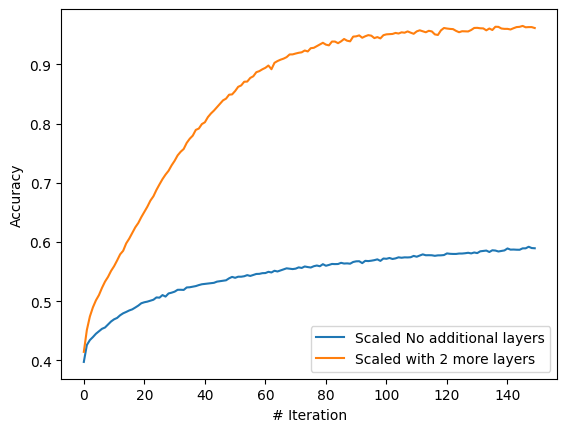

In [12]:

plot.plot(History_1.history['accuracy'], label='Scaled No additional layers')
plot.plot(History_2.history['accuracy'], label='Scaled with 2 more layers')
plot.xlabel('# Iteration')
plot.ylabel('Accuracy')
plot.legend(loc='lower right')

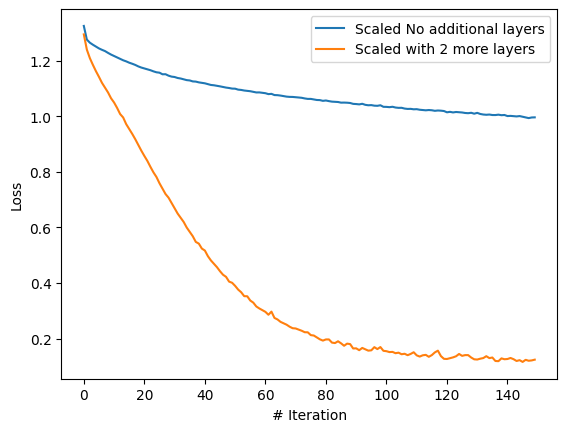

In [13]:

plot.plot(History_1.history['loss'], label='Scaled No additional layers')
plot.plot(History_2.history['loss'], label='Scaled with 2 more layers')
plot.xlabel('# Iteration')
plot.ylabel('Loss')
plot.legend()

In [14]:
#predicting model's performance
predictions_1 = model_1.predict(X_test_scaled)
predictions_2 = model_2.predict(X_test_scaled)


713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step


In [15]:
# Find the index of the maximum predicted probability for each instance.

pred_labels_1 = np.argmax(predictions_1, axis=1)
pred_labels_2 = np.argmax(predictions_2, axis=1)

# The inverse_transform() method of the LabelEncoder class is used to transform encoded labels back into their original categorical values. 
#It's the reverse operation of the fit_transform() method

pred_labels_decode_1 = label_encoder.inverse_transform(pred_labels_1)
pred_labels_decode_2 = label_encoder.inverse_transform(pred_labels_2)
# Count the number of correct predictions by comparing the true labels (y_test) with the predicted labels (pred_labels_decode)
correct_pred_1 = np.sum(y_test == pred_labels_decode_1)
correct_pred_2 = np.sum(y_test == pred_labels_decode_2)
total_test_samples = len(y_test)
print(total_test_samples)

accuracy_1 = correct_pred_1 / total_test_samples
accuracy_2 = correct_pred_2 / total_test_samples
print("Accuracy of model 1 on test data is: " + str(accuracy_1*100) + "\n")
print("Accuracy of model 2 on test data is: " + str(accuracy_2*100) + "\n")


22800
Accuracy of model 1 on test data is: 51.311403508771924

Accuracy of model 2 on test data is: 56.372807017543856



In [2]:
surprise_song

NameError: name 'surprise_song' is not defined

In [ ]:
obj_dict = vars(surprise_song)

X_1 = pd.DataFrame([surprise_song])

X_1 = X_1.drop(columns=["popularity", "popularity category", "Unnamed: 0", "track_id", "album_name", "track_name"])

X_1["artists"] = artist_label_encoder.fit_transform(X_1["artists"])
X_1["track_genre"] = genre_label_encoder.fit_transform(X_1["track_genre"])
X_1 = scaler.fit_transform(X_1)

label_encoder.inverse_transform(np.argmax(model_2.predict(X_1), axis=1))

NameError: name 'surprise_song' is not defined

# Machine Learning Algorithm

In [ ]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Converting classes into integers
label_encoder = LabelEncoder()
ytrain_encoded = label_encoder.fit_transform(y_train)
ytest_encoded = label_encoder.fit_transform(y_test)

# Initialize the Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
random_forest_model.fit(X_train, ytrain_encoded)


RandomForestClassifier(random_state=42)

In [ ]:
# Predicting on the Training set
y_pred = random_forest_model.predict(X_train)

# Evaluating the model
accuracy = accuracy_score(ytrain_encoded, y_pred)
print(f"Training Accuracy: {accuracy:.2f}")

Training Accuracy: 0.99


In [ ]:
# Predicting on the validation set
y_pred = random_forest_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(ytest_encoded, y_pred)
print(f"Testing Accuracy: {accuracy:.2f}")

Testing Accuracy: 0.72


# Conclusion





### Summary:
- **Neural Network vs. Random Forest**:
  - While the neural network models (especially Model 2) generally perform well, the Random Forest model exhibits higher testing accuracy in this specific case.
  - This suggests that for this particular dataset and task, the Random Forest model may be more effective at capturing the underlying patterns and generalizing to unseen data compared to the neural network models.
- **Overfitting**:
  - Model 2 still exhibits some overfitting, as seen by the higher training accuracy compared to the testing accuracy.
- **Potential for Improvement**:
  - Further experimentation and hyperparameter tuning could potentially enhance the performance of both the neural network and Random Forest models.
- **Conclusion**:
  - While the neural network models show promising results, especially Model 2 with two hidden layers, the Random Forest model demonstrates better performance, particularly in terms of testing accuracy for this classification task.